# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Muhammad Zidan Rizki Zulfazli
- **Email:** zidanrizki@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1485

## Menentukan Pertanyaan Bisnis

- Apakah ada Korelasi antara Tingkat Risiko Kesehatan Polusi Udara terhadap Konsentrasi Gas Penyusun Atmosfer (SO₂, NO₂, CO, dan O₃)?
- Apakah ada Korelasi antara Tingkat Risiko Kesehatan Polusi Udara terhadap Suhu, Kelembaban, Tekanan Udara, dan Curah Hujan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

In [2]:
pd.set_option("display.max_columns", None)

## Data Wrangling

### Gathering Data

Menggunakan library glob untuk menggabungkan semua file dengan format .csv dari folder data menjadi satu variabel. Variabel tersebut kemudian dibaca oleh pandas untuk digabung ke dalam sebuah dataframe bernama 'df'

In [3]:
csv_files = glob.glob("data/*.csv")

df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


Mengecek panjang baris dataframe 'df' dan mengecek 5 baris terbawah dan teratas

In [4]:
len(df)

420768

In [5]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Mengecek apakah semua "station" sudah ada di dataframe 'df' dengan perintah unique(), hasil pengecekan menunjukkan semua "station" sudah masuk di dataframe

In [7]:
df["station"].unique()

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

**Insight:**
- Terdapat 12 file csv dengan format kolom yang sama, semua digabungkan menjadi 1 dataframe dengan pembuktian semua nama unik kolom 'station' berada di dataframe
- Dengan menggunakan head() dan tail() kita bisa mengecek 5 data teratas dan terbawah yang mana keduanya memiliki nilai variabel 'station' yang berbeda, tapi nama variabel atau kolom yang berada di kedua data tersebut sama

### Assessing Data

len() untuk mengecek panjang baris dataframe

In [8]:
len(df)

420768

info() untuk mengcek tipe data tiap kolom, terdapat 18 kolom dimana 16 bertipe numerikal dan 2 bertipe kategorikal

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [10]:
df.dtypes

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

describe() untuk memberikan analisis mentah mengenai data bertipe numerikal di dataframe

In [11]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Perintah isnull() dan sum() untuk mengecek nilai null di tiap kolom, serta mengecek persentase nilai null dari keseluruhan data tiap kolom

In [12]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [13]:
persentase_nilai_kolom_null = df.isnull().sum() / len(df) * 100
print(persentase_nilai_kolom_null)

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


In [14]:
persentase_jumlah_row_null = df.isnull().any(axis=1).sum() / len(df) * 100
print(persentase_jumlah_row_null)

9.17370142216138


In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [16]:
df.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [17]:
len(df)

420768

Melakukan pengecekan nilai yang memiliki tipe data yang tidak sesuai dengan tipe data kolomnya, menggunakan lambda untuk menentukan berapa banyak nilai di tiap kolom yang memiliki tipe data tidak seharusnya

In [18]:
non_numeric_counts = {}
for col in numerical_cols:
    non_numeric_counts[col] = df[col].apply(lambda x: not isinstance(x, (int, float))).sum()

non_categorical_counts = {}
for col in categorical_cols:
    non_categorical_counts[col] = df[col].apply(lambda x: not isinstance(x, str)).sum()

print("Jumlah Nilai Tidak Numerik dalam Kolom Numerik:")
for col, count in non_numeric_counts.items():
    if count > 0:
        print(f"{col}: {count} nilai")
    else: print(f"{col}: {count}")

print("\nJumlah Nilai Tidak Kategorikal dalam Kolom Kategorikal:")
for col, count in non_categorical_counts.items():
    if count > 0:
        print(f"{col}: {count} nilai")
    else: print(f"{col}: {count}")

Jumlah Nilai Tidak Numerik dalam Kolom Numerik:
No: 0
year: 0
month: 0
day: 0
hour: 0
PM2.5: 0
PM10: 0
SO2: 0
NO2: 0
CO: 0
O3: 0
TEMP: 0
PRES: 0
DEWP: 0
RAIN: 0
WSPM: 0

Jumlah Nilai Tidak Kategorikal dalam Kolom Kategorikal:
wd: 1822 nilai
station: 0


Ada beberapa kolom yang tidak mungkin memiliki nilai negatif, kode dibawah melakukan pengecekan keberadaan nilai negatif itu ada atau tidak di tiap kolom

In [19]:
cols_no_negative = ["PM2.5", "PM10", "PRES", "RAIN"]  

for col in cols_no_negative:
    neg_values = df[df[col] < 0]
    if not neg_values.empty:
        print(f"Ditemukan nilai negatif di kolom {col}:")
        print(neg_values)
    else:
        print(f"Tidak ada nilai negatif di kolom {col}")

Tidak ada nilai negatif di kolom PM2.5
Tidak ada nilai negatif di kolom PM10
Tidak ada nilai negatif di kolom PRES
Tidak ada nilai negatif di kolom RAIN


Terdapat 0 baris yang duplikat dengan baris lain

In [20]:
print(df.duplicated().sum())

0


Mengecek apakah ada duplikasi, kesalahan ejaan, atau nilai yang tidak relevan pada data dengan tipe kategorikal, dari hasil pengecekan tidak ada kesalahan ejaan dan duplikasi, dan semua nilai masuk akal dengan nama kolom

In [21]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

wd: ['NNW' 'N' 'NW' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE'
 'ESE' 'S' 'SW' nan]
station: ['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


Melakukan pengecekan distribusi data dan outlier di kolom bertipe data numerik dengan menggunakan Interquartile Range dan Menggunakan boxplot untuk menjabarkan distribusi data, saya memutuskan tidak melakukan penanganan nilai outlier dikarenakan kolom yang memiliki outlier diwajarkan memilikinya karena cuaca bisa berubah drastis, bahkan nilai ini ada nilai utama untuk proses-proses selanjutnya untuk menjawab pertanyaan bisnis

In [22]:
outliers_dict = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1  
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outliers = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]
    outliers_dict[col] = len(outliers)

print("Jumlah Outlier di Kolom bertipe Numerik:")
for col, count in outliers_dict.items():
    print(f"{col}: {count} outliers")

Jumlah Outlier di Kolom bertipe Numerik:
No: 0 outliers
year: 0 outliers
month: 0 outliers
day: 0 outliers
hour: 0 outliers
PM2.5: 19142 outliers
PM10: 14658 outliers
SO2: 35566 outliers
NO2: 7021 outliers
CO: 28054 outliers
O3: 16599 outliers
TEMP: 0 outliers
PRES: 0 outliers
DEWP: 0 outliers
RAIN: 16520 outliers
WSPM: 23079 outliers


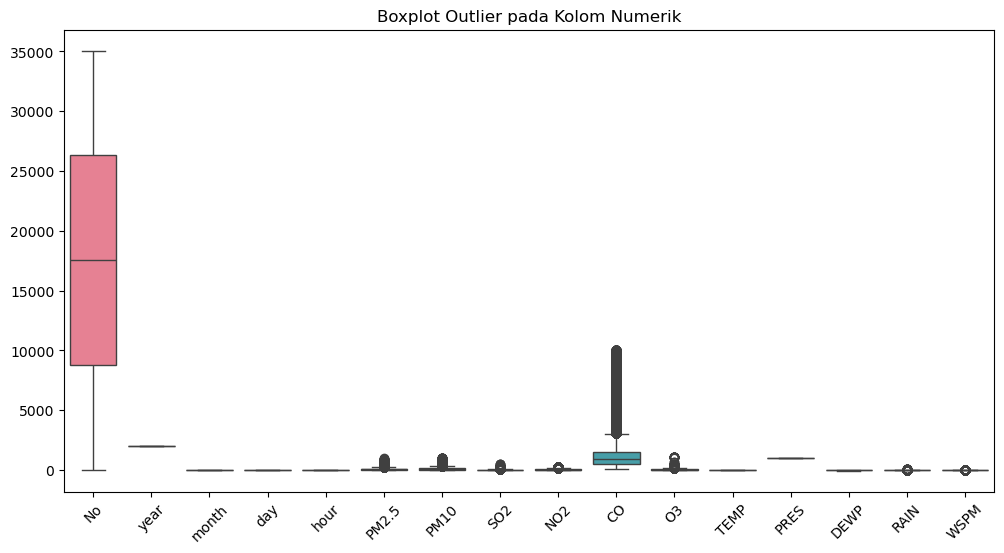

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Outlier pada Kolom Numerik")
plt.show()

Dikarenakan proyek hanya hingga analisis data dan tidak hingga pembuatan model, saya hanya menjabarkan distribusi data dengan barchart dan value_count tanpa melakukan pengecekan dan pengendalian outlier, tapi hanya dengan chart saja dapat diketahui bahwa hanya nilai 'NE' di kolom 'wd' yang memiliki nilai diluar nilai lainnya hampir 2 kali lipat nilai terendah, sedangkan di kolom 'station' semua nilai memiliki jumlah yang hampir sama

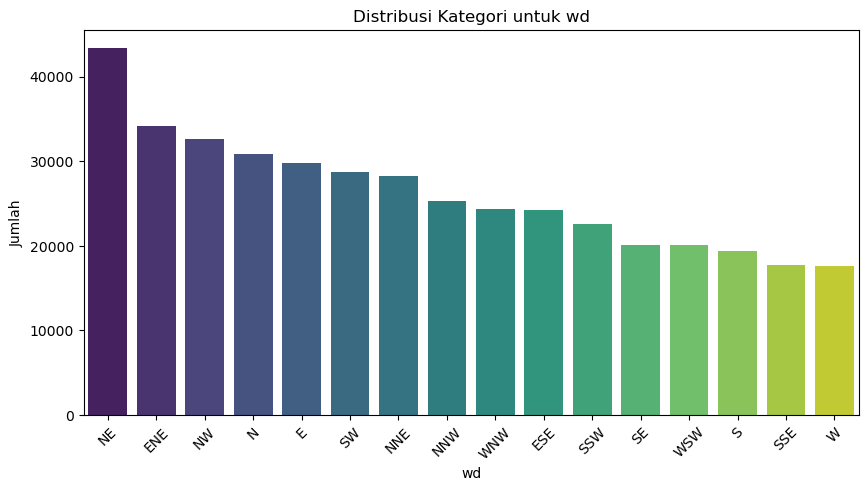

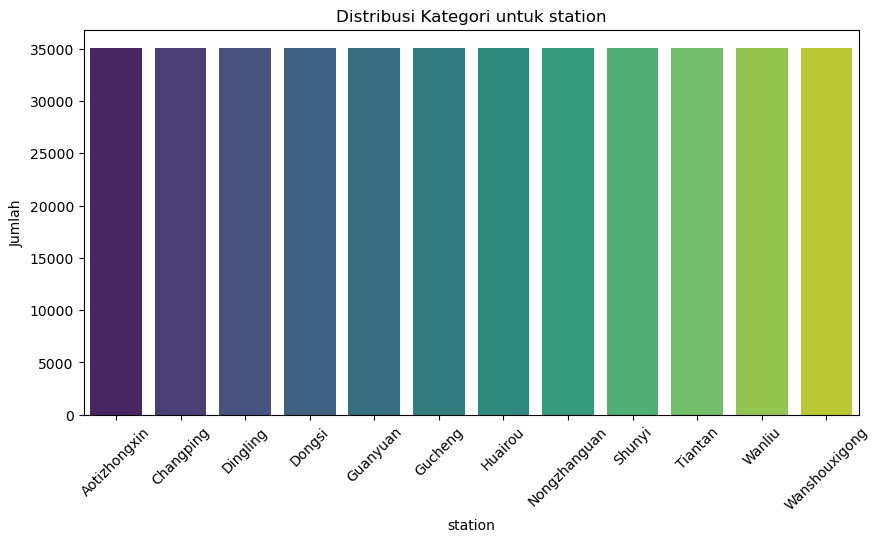

In [24]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))

    temp_df = df[col].value_counts().reset_index()
    temp_df.columns = [col, "count"]
    sns.barplot(data=temp_df, x=col, y="count", hue=col, dodge=False, legend=False, palette="viridis")

    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.title(f"Distribusi Kategori untuk {col}")

    plt.show()

In [25]:
for col in categorical_cols:
    print(f"\nDistribusi Kategori untuk '{col}':")
    print(df[col].value_counts())
    print("-" * 50) 


Distribusi Kategori untuk 'wd':
wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64
--------------------------------------------------

Distribusi Kategori untuk 'station':
station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64
--------------------------------------------------


In [26]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
- terdapat 420768 baris data dengan 18 kolom dimana 16 bertipe numerikal dan 2 bertipe kategorikal dimana satu kolom adalah indeks urutan
- Hampir 10% baris dari data memiliki nilai null
- Terdapat 0 baris duplikat, 0 baris nilai negatif untuk nilai di kolom numerik yang tidak seharusnya negatif, dan tidak ada nilai di kolom kategorikal yang memiliki nilai tidak wajar
- Tidak ada nilai yang memiliki tipe data yang tidak sesuai dengan tipe data kolomnya
- Terdapat jumlah outlier signifikan di kolom bertipe numerik, tapi saya tidak melakukan penanganan outlier karna nilai ini menunjukkan perubahan cuaca yang drastis yang penting untuk analisis nantinya, tidak ada outlier yang signifikan untuk kolom bertipe kategorikal

### Cleaning Data

Dikarenakan hampir 10% baris dari data memiliki nilai null, maka saya memutuskan mefill setiap nilai null dengan nilai median untuk tipe data numerikal dan menggunakan perintah dropna untuk tipe kategorikal karena nilai nullnya hanya membentuk kurang dari 1 persen data

In [27]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [28]:
df = df.dropna(subset=categorical_cols)

In [29]:
df = df.dropna().reset_index(drop=True)

Data sudah bersih secara dasar, jadi saya ubah dataframe menjadi 'df_cleaned', tapi pekerjaan cleaning data belum selesai karena belum melakukan mapping data yang penting untuk proses EDA

In [30]:
df_cleaned = df.copy()

In [31]:
df_cleaned.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [32]:
len(df_cleaned)

418946

In [33]:
len(df_cleaned.columns)

18

Sebelum melakukan data assesment saya melakukan penelitian menggunakan internet mengenai pengertian dan kegunaan tiap kolom di data, ini adalah rangkuman singkatnya:
- No: Nomor urut data.
- year: Tahun pencatatan data kualitas udara.
- month: Bulan pencatatan data (1–12).
- day: Hari pencatatan data (1–31).
- hour: Jam pencatatan data (0–23).
- PM2.5: Konsentrasi partikulat halus (PM2.5) dalam µg/m³.
- PM10: Konsentrasi partikulat kasar (PM10) dalam µg/m³.
- SO2: Konsentrasi gas sulfur dioksida (SO₂) dalam µg/m³.
- NO2: Konsentrasi gas nitrogen dioksida (NO₂) dalam µg/m³.
- CO: Konsentrasi karbon monoksida (CO) dalam mg/m³.
- O3: Konsentrasi ozon (O₃) dalam µg/m³.
- TEMP: Suhu udara dalam derajat Celcius.
- PRES: Tekanan udara dalam hektopascal.
- DEWP: Titik embun dalam derajat Celcius.
- RAIN: Curah hujan dalam mm.
- wd: Arah angin.
- WSPM: Kecepatan angin dalam m/s.
- station: Nama stasiun pemantauan kualitas udara.

sesuai dengan kebutuhan analisis untuk menjawab pertanyaan bisnis dan agar lebih untuk melakukan explorasi, saya mengdrop kolom yang tidak butuhkan untuk analisis ('No', 'year', 'mont', 'day', 'hour', 'wd', 'WSPM', dan 'station')

In [34]:
df_cleaned = df_cleaned.drop(columns=['No', 'year', 'month', 'day', 'hour', 'wd', 'WSPM', 'station'])
df_cleaned.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN'],
      dtype='object')

Menurut standar WHO dan EPA, kualitas udara berdasarkan PM2.5 dan PM10 dapat diklasifikasikan sebagai berikut:

| **Kategori**              | **PM2.5 (µg/m³)**  | **PM10 (µg/m³)**  |
|--------------------------|------------------|------------------|
| **Baik**                | 0 - 12           | 0 - 54           |
| **Sedang**              | 13 - 35          | 55 - 154         |
| **Tidak Sehat**         | 36 - 55          | 155 - 254        |
| **Sangat Tidak Sehat**  | 56 - 150         | 255 - 354        |
| **Berbahaya**           | >150             | >354             |

dibawah saya mengkategorikan tingkat polusi tiap baris berdasarkan nilai pm (2.5 % 10), setelah itu saya menambahkan kolom "Tingkat Polusi' dengan nilai 'Tidak Sehat' jika salah satu pm bernilai diatas 2, saya juga mengubah dataframe menjadi 'df_encoded'


In [35]:
df_encoded = df_cleaned.copy()

In [36]:
def classify_pm2_5(value):
    if value <= 12:
        return "Baik"
    elif value <= 35:
        return "Sedang"
    elif value <= 55:
        return "Tidak Sehat"
    elif value <= 150:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def classify_pm10(value):
    if value <= 54:
        return "Baik"
    elif value <= 154:
        return "Sedang"
    elif value <= 254:
        return "Tidak Sehat"
    elif value <= 354:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df_encoded["PM2.5 Category"] = df_encoded["PM2.5"].apply(classify_pm2_5)
df_encoded["PM10 Category"] = df_encoded["PM10"].apply(classify_pm10)

category_mapping = {
    "Baik": 0,
    "Sedang": 1,
    "Tidak Sehat": 2,
    "Sangat Tidak Sehat": 3,
    "Berbahaya": 4
}

df_encoded["PM2.5 Category Encoded"] = df_encoded["PM2.5 Category"].map(category_mapping)
df_encoded["PM10 Category Encoded"] = df_encoded["PM10 Category"].map(category_mapping)

print(df_encoded.head())


   PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0   
1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0   
2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0   
3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   
4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0   

  PM2.5 Category PM10 Category  PM2.5 Category Encoded  PM10 Category Encoded  
0           Baik          Baik                       0                      0  
1           Baik          Baik                       0                      0  
2           Baik          Baik                       0                      0  
3           Baik          Baik                       0                      0  
4           Baik          Baik                       0                      0  


In [37]:
def classify_tingkat_polusi(pm25_cat, pm10_cat):
    if pm25_cat > 2 or pm10_cat > 2:  
        return "Tidak Sehat"
    return "Sehat"

df_encoded["Tingkat Polusi"] = df_encoded.apply(
    lambda row: classify_tingkat_polusi(row["PM2.5 Category Encoded"], row["PM10 Category Encoded"]), axis=1
)

tingkat_polusi_mapping = {"Sehat": 0, "Tidak Sehat": 1}
df_encoded["Tingkat Polusi Encoded"] = df_encoded["Tingkat Polusi"].map(tingkat_polusi_mapping)


print(df_encoded[["PM2.5 Category Encoded", "PM10 Category Encoded", "Tingkat Polusi", "Tingkat Polusi Encoded"]].head())


   PM2.5 Category Encoded  PM10 Category Encoded Tingkat Polusi  \
0                       0                      0          Sehat   
1                       0                      0          Sehat   
2                       0                      0          Sehat   
3                       0                      0          Sehat   
4                       0                      0          Sehat   

   Tingkat Polusi Encoded  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  


In [38]:
df_encoded.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'PM2.5 Category', 'PM10 Category', 'PM2.5 Category Encoded',
       'PM10 Category Encoded', 'Tingkat Polusi', 'Tingkat Polusi Encoded'],
      dtype='object')

In [39]:
df_encoded["Tingkat Polusi Sehat"] = (df_encoded["Tingkat Polusi Encoded"] == 0).astype(int)
df_encoded["Tingkat Polusi Tidak Sehat"] = (df_encoded["Tingkat Polusi Encoded"] == 1).astype(int)

In [40]:
output_dir = "dashboard"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "main_data.csv")

if not os.path.exists(output_path):
    df_encoded.to_csv(output_path, index=False)
    print(f"File disimpan di {output_path}")
else:
    print("File sudah ada, tidak dibuat ulang.")

File disimpan di dashboard\main_data.csv


**Insight:**
- Dikarenakan hampir 10% baris dari data memiliki nilai null, maka saya memutuskan mefill setiap nilai null dengan nilai median untuk tipe data numerikal dan menggunakan perintah dropna untuk tipe kategorikal karena nilai nullnya hanya membentuk kurang dari 1 persen data
- Menyimpan data bersih di dataframe baru bernama 'df_cleaned'
- Melakukan drop kolom yang tidak dibutuhkan untuk eksplorasi data untuk menjawab pertanyaan bisnis
- Melakukan mapping untuk tingkat risiko kesehatan polusi berdasarkan nilai pm 2.5 dan 10
- Menyimpan dataframe yang bersih dan sudah diencoded ke folder dashboard untuk bisa diakses streamlit

## Exploratory Data Analysis (EDA)

### Explore ...

Fungsi df_encoded.describe() digunakan untuk menampilkan statistik deskriptif dari dataframe

In [41]:
df_encoded.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,PM2.5 Category Encoded,PM10 Category Encoded,Tingkat Polusi Encoded,Tingkat Polusi Sehat,Tingkat Polusi Tidak Sehat
count,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000,418946.000000
mean,79.190283,104.189361,15.653426,50.373034,1212.643976,57.115111,13.562993,1010.732122,2.493125,0.064595,2.119509,0.951309,0.488894,0.511106,0.488894
std,80.020300,91.089309,21.474908,34.626370,1132.051091,55.848229,11.433711,10.474404,13.799435,0.822313,1.316332,0.934325,0.499877,0.499877,0.499877
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,4.000000,4.000000,1.000000,1.000000,1.000000


Mengelompokkan data berdasarkan Tingkat Risiko Kesehatan Polusi Encoded (0 == Seaht, 1 == Tidak Sehat), menghitung rata-rata konsentrasi SO₂, NO₂, CO, dan O₃ untuk setiap kategori polusi, lalu menambahkan baris "Perbedaan (%)" untuk menunjukkan perubahan persentase dari kondisi sehat ke tidak sehat, sehingga mempermudah analisis hubungan antara polusi udara dan konsentrasi gas. Penjelasan hasil di insight

In [42]:
comparison_df = df_encoded.groupby("Tingkat Polusi Encoded").agg({
    "SO2": "mean",
    "NO2": "mean",
    "CO": "mean",
    "O3": "mean"
})

comparison_df.loc["Perbedaan (%)"] = (
    (comparison_df.loc[1] - comparison_df.loc[0]) / comparison_df.loc[0] * 100
)

print(comparison_df)


                               SO2         NO2           CO         O3
Tingkat Polusi Encoded                                                
0                         7.402846   33.051882   617.308174  60.388732
1                        24.278872   68.481172  1835.028869  53.692753
Perbedaan (%)           227.966745  107.192957   197.263012 -11.088127


In [43]:
print("\nStatistik Deskriptif:")
print(df_encoded[["Tingkat Polusi Sehat", "SO2", "NO2", "CO", "O3"]].describe())


Statistik Deskriptif:
       Tingkat Polusi Sehat            SO2            NO2             CO  \
count         418946.000000  418946.000000  418946.000000  418946.000000   
mean               0.511106      15.653426      50.373034    1212.643976   
std                0.499877      21.474908      34.626370    1132.051091   
min                0.000000       0.285600       1.026500     100.000000   
25%                0.000000       3.000000      24.000000     500.000000   
50%                1.000000       7.000000      43.000000     900.000000   
75%                1.000000      19.000000      70.000000    1500.000000   
max                1.000000     500.000000     290.000000   10000.000000   

                  O3  
count  418946.000000  
mean       57.115111  
std        55.848229  
min         0.214200  
25%        12.000000  
50%        45.000000  
75%        80.000000  
max      1071.000000  


Mengelompokkan data berdasarkan Tingkat Risiko Kesehatan Polusi Encoded (0 == Seaht, 1 == Tidak Sehat), menghitung rata-rata konsentrasi suhu, kelembaban, tekanan udara, dan curah hujan untuk setiap kategori polusi, lalu menambahkan baris "Perbedaan (%)" untuk menunjukkan perubahan persentase dari kondisi sehat ke tidak sehat, sehingga mempermudah analisis hubungan antara polusi udara dan konsentrasi gas. Penjelasan hasil di insight

In [44]:
comparison_df2 = df_encoded.groupby("Tingkat Polusi Encoded").agg({
    "TEMP": "mean",
    "DEWP": "mean",
    "PRES": "mean",
    "RAIN": "mean"
})

comparison_df2.loc["Perbedaan (%)"] = (
    (comparison_df2.loc[1] - comparison_df2.loc[0]) / comparison_df2.loc[0] * 100
)

print(comparison_df2)

                             TEMP         DEWP         PRES       RAIN
Tingkat Polusi Encoded                                                
0                       13.809474    -0.185932  1011.300583   0.071215
1                       13.305314     5.293905  1010.137834   0.057675
Perbedaan (%)           -3.650827 -2947.224853    -0.114976 -19.013579


In [45]:
print("\nStatistik Deskriptif:")
print(df_encoded[["Tingkat Polusi Sehat", "TEMP", "DEWP", "PRES", "RAIN"]].describe())


Statistik Deskriptif:
       Tingkat Polusi Sehat           TEMP           DEWP           PRES  \
count         418946.000000  418946.000000  418946.000000  418946.000000   
mean               0.511106      13.562993       2.493125    1010.732122   
std                0.499877      11.433711      13.799435      10.474404   
min                0.000000     -19.900000     -36.000000     982.400000   
25%                0.000000       3.200000      -8.900000    1002.200000   
50%                1.000000      14.500000       3.100000    1010.400000   
75%                1.000000      23.300000      15.100000    1019.000000   
max                1.000000      41.600000      29.100000    1042.800000   

                RAIN  
count  418946.000000  
mean        0.064595  
std         0.822313  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        72.500000  


**Insight:**
- Membandingkan Tingkat Risiko Polusi Kesehatan terhadap gas penyusun atmosfer dengan acuan nilai mean konsentrasi gas disaat kondisi polusi sehat dan tidak sehat. Konsentrasi SO₂, NO₂, dan CO meningkat signifikan saat polusi tidak sehat, dengan SO₂ naik 228%, NO₂ naik 107%, dan CO naik 197%, menunjukkan korelasi tinggi antara gas-gas ini dengan kondisi udara buruk. Sebaliknya, O₃ justru menurun 11% saat polusi memburuk, kemungkinan karena pembentukan O₃ lebih dominan saat cuaca cerah, sedangkan polusi tinggi sering terjadi dalam kondisi udara stagnan. Temuan ini mengindikasikan bahwa polusi udara lebih dipengaruhi oleh emisi langsung dari sumber kendaraan dan industri dibandingkan dengan gas sekunder seperti O₃.
- Membandingkan Tingkat Risiko Polusi Kesehatan terhadap gas penyusun atmosfer dengan acuan nilai mean konsentrasi gas disaat kondisi polusi sehat dan tidak sehat. Suhu turun -3.65% saat polusi meningkat, namun perubahan ini kecil dan kemungkinan tidak signifikan terhadap polusi. Sebaliknya, kelembaban mengalami lonjakan drastis +2947%, yang mungkin disebabkan oleh anomali data atau skala pengukuran yang berbeda. Tekanan udara hanya turun -0.11%, menunjukkan bahwa pengaruhnya terhadap polusi kemungkinan sangat kecil. Sementara itu, curah hujan turun -19.01% saat polusi meningkat, yang dapat mengindikasikan bahwa hujan berperan dalam membersihkan udara dari polutan. Secara keseluruhan, curah hujan tampaknya memiliki hubungan yang lebih kuat dengan tingkat polusi dibandingkan faktor lainnya, sementara suhu dan tekanan udara menunjukkan pengaruh yang lebih lemah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

##### Apakah ada Korelasi antara Tingkat Risiko Kesehatan Polusi Udara terhadap Konsentrasi Gas Penyusun Atmosfer (SO₂, NO₂, CO, dan O₃)?

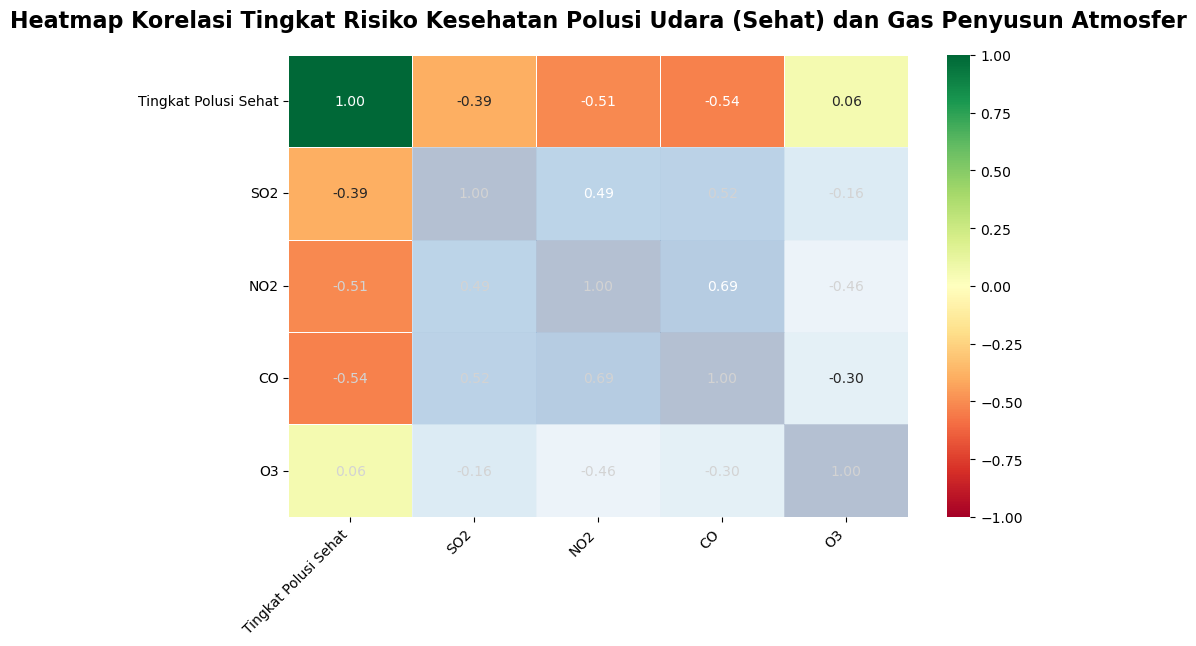

In [46]:
correlation_columns_pollutions_gas_sehat = ["Tingkat Polusi Sehat", "SO2", "NO2", "CO", "O3"]
correlation_matrix_gas_sehat = df_encoded[correlation_columns_pollutions_gas_sehat].corr()

mask = np.zeros_like(correlation_matrix_gas_sehat, dtype=bool)
mask[1:, 1:] = True  
vmin, vmax = -1, 1  

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    correlation_matrix_gas_sehat, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, 
    mask=mask, vmin=vmin, vmax=vmax  
)

sns.heatmap(
    correlation_matrix_gas_sehat, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, 
    mask=~mask, alpha=0.3, cbar=False, vmin=vmin, vmax=vmax
)

for text in ax.texts:
    if text.get_text() != "":
        row, col = divmod(ax.texts.index(text), len(correlation_matrix_gas_sehat.columns))
        if row != 0 and col != 0:  
            text.set_color("lightgrey")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Heatmap Korelasi Tingkat Risiko Kesehatan Polusi Udara (Sehat) dan Gas Penyusun Atmosfer", 
          fontsize=16, fontweight="bold", pad=20)

plt.show()


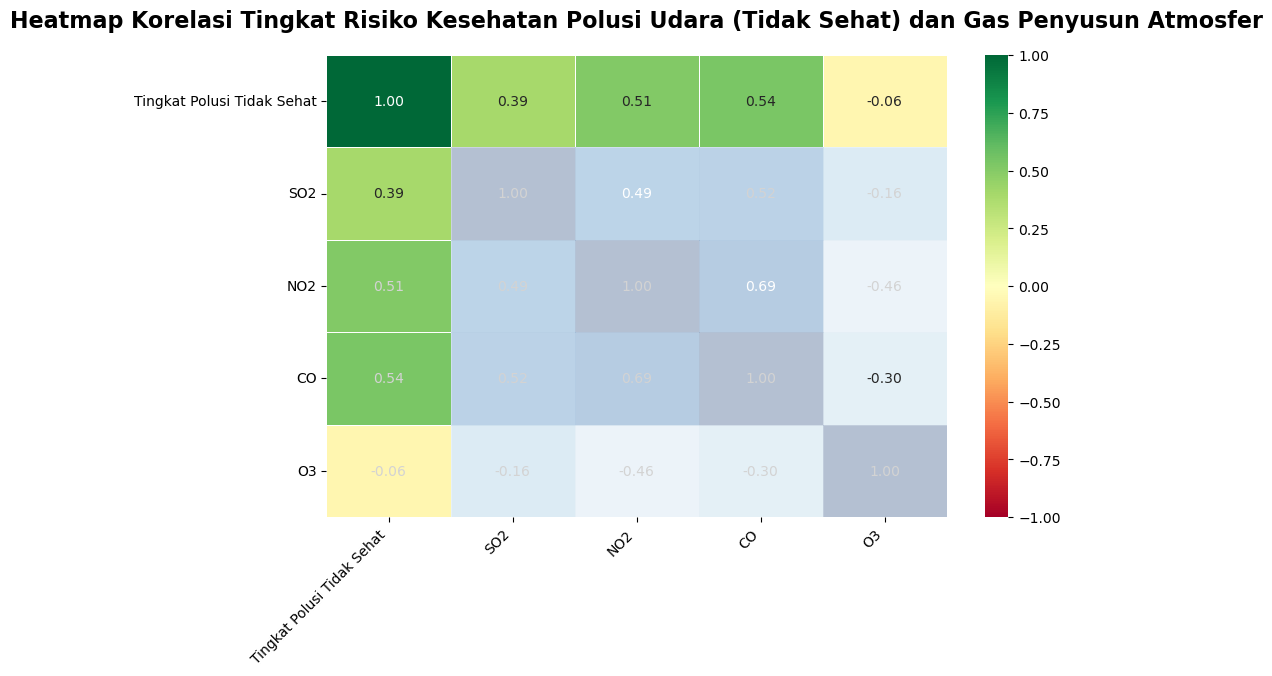

In [47]:
correlation_columns_pollutions_gas_tidak_sehat = ["Tingkat Polusi Tidak Sehat", "SO2", "NO2", "CO", "O3"]
correlation_matrix_gas_tidak_sehat = df_encoded[correlation_columns_pollutions_gas_tidak_sehat].corr()

mask = np.zeros_like(correlation_matrix_gas_tidak_sehat, dtype=bool)
mask[1:, 1:] = True  
vmin, vmax = -1, 1  

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    correlation_matrix_gas_tidak_sehat, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, 
    mask=mask, vmin=vmin, vmax=vmax  
)

sns.heatmap(
    correlation_matrix_gas_tidak_sehat, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, 
    mask=~mask, alpha=0.3, cbar=False, vmin=vmin, vmax=vmax
)

for text in ax.texts:
    if text.get_text() != "":
        row, col = divmod(ax.texts.index(text), len(correlation_matrix_gas_tidak_sehat.columns))
        if row != 0 and col != 0:  
            text.set_color("lightgrey")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Heatmap Korelasi Tingkat Risiko Kesehatan Polusi Udara (Tidak Sehat) dan Gas Penyusun Atmosfer", 
          fontsize=16, fontweight="bold", pad=20)

plt.show()


**Insight:**
- Saya menggunakan Heatmap untuk menunjukkan korelasi Gas Penyusun Atmosfer (SO₂, NO₂, CO, dan O₃) terhadap tingkat risiko Kesehatan polusi udara
- Dari hasil pengamatan di Heatmap dimana semakin nilai mendekati 1 atau -1 maka semakin tinggi korelasi
- Dari hasil pengamatan untuk korelasi tingkat sehat semua jenis gas kurang dari 0 kecuali gas O₃,  dan di tingkat tidak sehat kebalikannya, yang mana berarti selain gas O₃ semua gas penyusun atmosfer berpengaruh positif atau beriringan dengan tingkat risiko polusi udara yang semakin buruk untuk kesehatan, sedang gas O₃ yang merupakan gas ozon menunjukkan kebalikan dan beriringan dengan semakin baiknya tingkat risiko polusi udara terhadap kesehatan

### Pertanyaan 2:

##### Apakah ada Korelasi antara Tingkat Risiko Kesehatan Polusi Udara terhadap Suhu, Kelembaban, Tekanan Udara, dan Curah Hujan?

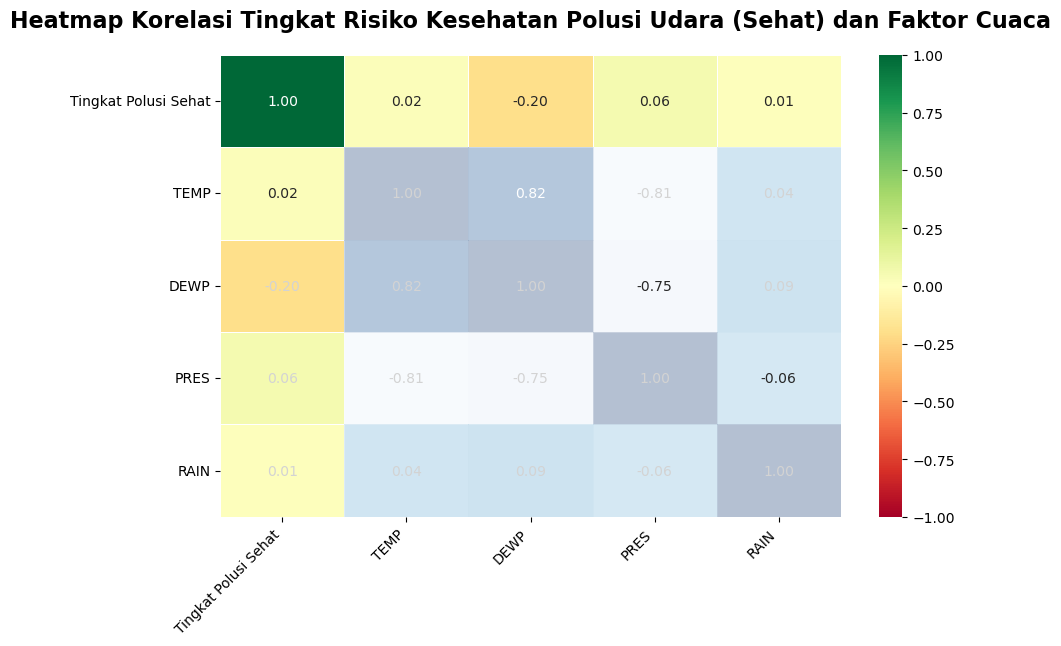

In [48]:
correlation_columns_pollutions_sehat = ["Tingkat Polusi Sehat", "TEMP", "DEWP", "PRES", "RAIN"]
correlation_matrix_sehat = df_encoded[correlation_columns_pollutions_sehat].corr()

mask = np.zeros_like(correlation_matrix_sehat, dtype=bool)
mask[1:, 1:] = True  
vmin, vmax = -1, 1  

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    correlation_matrix_sehat, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, 
    mask=mask, vmin=vmin, vmax=vmax  
)

sns.heatmap(
    correlation_matrix_sehat, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, 
    mask=~mask, alpha=0.3, cbar=False, vmin=vmin, vmax=vmax
)

for text in ax.texts:
    if text.get_text() != "":
        row, col = divmod(ax.texts.index(text), len(correlation_matrix_sehat.columns))
        if row != 0 and col != 0:  
            text.set_color("lightgrey")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Heatmap Korelasi Tingkat Risiko Kesehatan Polusi Udara (Sehat) dan Faktor Cuaca", 
          fontsize=16, fontweight="bold", pad=20)

plt.show()


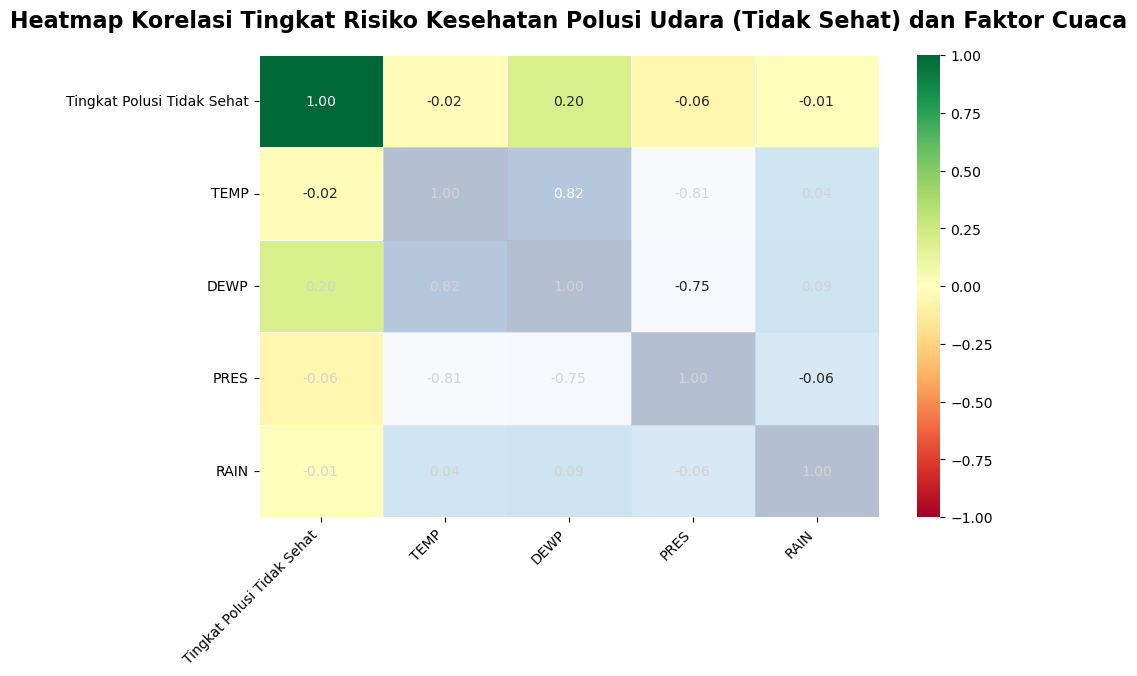

In [49]:
correlation_columns_pollutions_tidak_sehat = ["Tingkat Polusi Tidak Sehat", "TEMP", "DEWP", "PRES", "RAIN"]
correlation_matrix_tidak_sehat = df_encoded[correlation_columns_pollutions_tidak_sehat].corr()

mask = np.zeros_like(correlation_matrix_tidak_sehat, dtype=bool)
mask[1:, 1:] = True  
vmin, vmax = -1, 1  

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    correlation_matrix_tidak_sehat, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, 
    mask=mask, vmin=vmin, vmax=vmax  
)

sns.heatmap(
    correlation_matrix_tidak_sehat, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, 
    mask=~mask, alpha=0.3, cbar=False, vmin=vmin, vmax=vmax
)

for text in ax.texts:
    if text.get_text() != "":
        row, col = divmod(ax.texts.index(text), len(correlation_matrix_tidak_sehat.columns))
        if row != 0 and col != 0:  
            text.set_color("lightgrey")

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Heatmap Korelasi Tingkat Risiko Kesehatan Polusi Udara (Tidak Sehat) dan Faktor Cuaca", 
          fontsize=16, fontweight="bold", pad=20)

plt.show()


**Insight:**
- Saya menggunakan Heatmap untuk menunjukkan korelasi suhu, kelembaban (Titik Embun), tekanan udara, dan curah hujan terhadap tingkat risiko Kesehatan polusi udara
- Dari hasil pengamatan di Heatmap dimana semakin nilai mendekati 1 atau -1 maka semakin tinggi korelasi, dari hasil tidak ada satupun kolom pembanding yang mendekati 1 ataupun -1 secara signifikan, yang berarti suhu, kelembaban, tekanan udara, dan curah hujan berefek minimal atau sedikit terhadap tingkat risiko kesehatan polusi udara

## Conclusion

- **Conclution pertanyaan 1:**  Gas penyusun atmosfer (SO₂, NO₂, CO) memiliki korelasi positif dengan peningkatan risiko polusi udara terhadap kesehatan, sedangkan O₃ menunjukkan tren sebaliknya. Ini mengindikasikan bahwa semakin tinggi konsentrasi SO₂, NO₂, dan CO, semakin buruk dampaknya bagi kesehatan, sementara meningkatnya konsentrasi O₃ justru menunjukkan dengan udara yang lebih sehat.

- **Conclution pertanyaan 2:** Berdasarkan hasil analisis korelasi menggunakan Heatmap, suhu, kelembaban (titik embun), tekanan udara, dan curah hujan tidak memiliki korelasi yang signifikan terhadap tingkat risiko kesehatan polusi udara. Hal ini menunjukkan bahwa faktor-faktor cuaca tersebut hanya memiliki pengaruh minimal terhadap kualitas udara yang berdampak pada kesehatan.